<a href="https://colab.research.google.com/github/AyushPratap07/Salary-Prediction-using-Ensemble-Learning/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving salaries.csv to salaries.csv


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib


In [ ]:
# 2. Load Dataset
df = pd.read_csv('salaries.csv')  # make sure it's the uploaded file name
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.dropna(inplace=True)

# Encode categorical features
label_cols = ['Education', 'City', 'Gender', 'EverBenched']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
voting = VotingRegressor([('rf', rf), ('gb', gb)])

# Train each
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
voting.fit(X_train, y_train)


VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42))])

In [ ]:
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'Voting': voting}

for name, model in models.items():
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name} → MSE: {mse:.2f}, R²: {r2:.2f}")


Random Forest → MSE: 0.12, R²: 0.47
Gradient Boosting → MSE: 0.11, R²: 0.51
Voting → MSE: 0.11, R²: 0.53


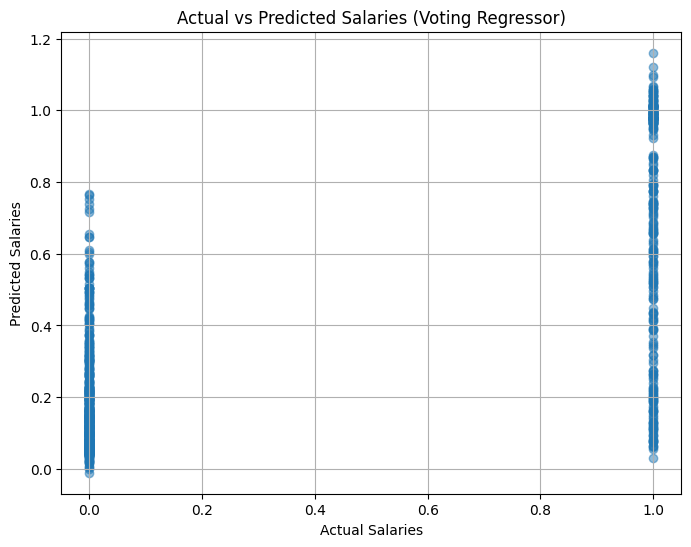

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, voting.predict(X_test), alpha=0.5)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted Salaries (Voting Regressor)")
plt.grid(True)
plt.show()


In [ ]:
joblib.dump(voting, 'salary_predictor.pkl')
from google.colab import files
files.download('salary_predictor.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

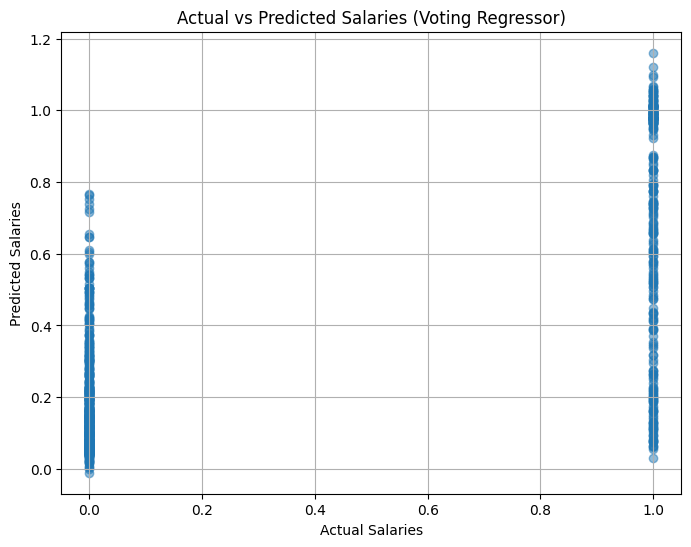

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, voting.predict(X_test), alpha=0.5)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted Salaries (Voting Regressor)")
plt.grid(True)
plt.savefig("actual_vs_predicted.png")  # Save as image
plt.show()


In [ ]:
from google.colab import files
files.download("actual_vs_predicted.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install joblib